In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

with mpl.rc_context(fname='.matplotlibrc'):
    # Data
    models = ['GPT-3.5', 'GPT-4', 'Mixtral-8x7B', 'Qwen-72B', 'LlaMa2-70B', 'LlaMa3-70B', 'OpenBioLLM-70B', 'Med42-70B']
    metrics = ['F1 Score (Normalized)', 'Confidence Score', 'Calibration (1 - Brier Score)']

    # Actual Data
    f1_scores = np.array([
        [38.17, 48.05, 49.08, 51.46, 50.99],
        [52.27, 50.78, 52.30, 51.72, 53.44],
        [51.66, 45.41, 52.76, 52.64, 50.45],
        [39.21, 44.31, 45.41, 47.91, 45.70],
        [38.54, 39.78, 42.06, 39.92, 41.57],
        [39.84, 50.06, 49.21, 48.03, 48.65],
        [38.56, 46.63, 52.19, 50.01, 53.06],
        [45.10, 31.09, 46.70, 45.05, 47.63]
    ])

    confidence_scores = np.array([
        [0.62, 0.75, 0.65, 0.81, 0.99],
        [0.44, 0.68, 0.46, 0.68, 0.99],
        [0.50, 0.63, 0.45, 0.69, 0.77],
        [0.60, 0.79, 0.67, 0.87, 0.99],
        [0.51, 0.70, 0.46, 0.91, 0.99],
        [0.93, 0.63, 0.60, 0.80, 0.99],
        [0.56, 0.86, 0.72, 0.88, 0.98],
        [0.70, 0.92, 0.75, 0.90, 0.98],
    ])

    brier_scores = np.array([
        [0.046085, 0.102645, 0.077054, 0.034923, 0.048981],
        [0.170253, 0.089790, 0.140619, 0.077435, 0.060211],
        [0.119250, 0.076820, 0.125987, 0.074697, 0.102299],
        [0.085287, 0.093954, 0.078457, 0.054161, 0.031092],
        [0.177185, 0.252753, 0.169653, 0.076720, 0.047842],
        [0.060909, 0.076755, 0.068321, 0.018193, 0.047827],
        [0.188301, 0.042845, 0.098408, 0.018526, 0.058591],
        [0.064384, 0.012572, 0.045567, 0.016434, 0.033987],


    ])

    # Normalize F1 scores
    normalized_f1_scores = (f1_scores - f1_scores.min(axis=0)) / (f1_scores.max(axis=0) - f1_scores.min(axis=0))

    # Calculate average values across all prompt styles
    avg_f1_scores = normalized_f1_scores.mean(axis=1)
    avg_confidence_scores = confidence_scores.mean(axis=1)
    avg_calibration_scores = 1 - brier_scores.mean(axis=1)


Duplicate key in file '.matplotlibrc', line 15 ('font.sans-serif      : Arial, sans-serif')


Duplicate key in file '/mnt/lustre/home/akata/mdani31/semioLLM/visualization/.matplotlibrc', line 15 ('font.sans-serif      : Arial, sans-serif')
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-seri

Model: GPT-3.5, Values: [0.64365114 0.764      0.9380624  0.64365114]
Model: GPT-4, Values: [0.97693646 0.65       0.8923384  0.97693646]
Model: Mixtral-8x7B, Values: [0.88642296 0.608      0.9001894  0.88642296]
Model: Qwen-72B, Values: [0.40686608 0.784      0.9314098  0.40686608]
Model: LlaMa2-70B, Values: [0.09351638 0.714      0.8551694  0.09351638]
Model: LlaMa3-70B, Values: [0.5968275 0.79      0.945599  0.5968275]
Model: OpenBioLLM-70B, Values: [0.70496943 0.8        0.9186658  0.70496943]
Model: Med42-70B, Values: [0.36779337 0.85       0.9654112  0.36779337]


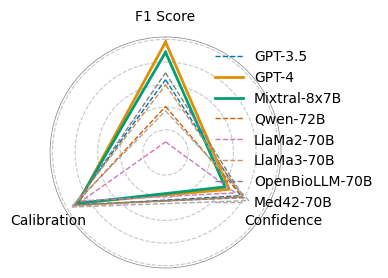

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

with mpl.rc_context(fname="/mnt/lustre/home/akata/mdani31/semioLLM/visualization/.matplotlibrc"):
    def create_radar_chart():
        # Setup
        metrics = ['F1 Score', 'Confidence', 'Calibration']
        angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
        angles = np.concatenate((angles, [angles[0]]))

        fig, ax = plt.subplots(figsize=(4, 3), subplot_kw=dict(polar=True))
        colors = sns.color_palette("colorblind")
        # Plot data
        for i, model in enumerate(models):
            values = [avg_f1_scores[i], avg_confidence_scores[i], avg_calibration_scores[i]]
            values = np.concatenate((values, [values[0]]))
            print(f"Model: {model}, Values: {values}")
            
            #color = '#FF8C00' if model in ['GPT-4', 'Mixtral-8x7B'] else '#808080'
            linestyle = '-' if model in ['GPT-4', 'Mixtral-8x7B'] else '--'
            linewidth = 2 if model in ['GPT-4', 'Mixtral-8x7B'] else 1
            color = colors[i % len(colors)]
            #if model is 'OpenBioLLM-70B' then color is gray and if 'Med42-70B' light gray
            if model == 'OpenBioLLM-70B': 
                color = "#7f7f7f"
            elif model == 'Med42-70B':
                color = "#aaaaaa"
            ax.plot(angles, values, color=color, linewidth=linewidth, 
                    linestyle=linestyle, label=model)
            #ax.fill(angles, values, color=color, alpha=0.1)


        # Customize plot
        ax.set_theta_offset(np.pi/2)
        ax.set_theta_direction(-1)
        ax.set_rlabel_position(0)
        ax.tick_params(axis='both', which='major')
        ax.spines['polar'].set_color('gray')
        ax.spines['polar'].set_linewidth(0.5)
        # Add metric labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)
        
        # Add gridlines
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Set ylim and remove yticks
        ax.set_xticks([])
        ax.set_yticklabels([])

        # Manually add metric labels
        label_angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
        label_radius = 1.2
        for angle, metric in zip(label_angles, metrics):
            x = label_radius * np.cos(angle - np.pi/2)
            y = label_radius * np.sin(angle - np.pi/2)
            ha = 'center' if abs(x) < 0.1 else 'left' if x > 0 else 'right'
            va = 'center' if abs(y) < 0.1 else 'bottom' if y > 0 else 'top'
            ax.text(angle, 1.2, metric, ha='center', va='center', fontsize=10)
        
        # Add legend
        legend = ax.legend(bbox_to_anchor=(1.45, 1), loc='upper right', 
                        frameon=False)

        #plt.tight_layout()
        return fig

    # Create plot
    fig = create_radar_chart()
    #plt.savefig("average_scores.svg")
    plt.show()